## PPG analysis FROM a VIDEO

In [ ]:
#importing Basic Libraries
import cv2
from google.colab.patches import cv2_imshow
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/WhatsApp Video 2021-04-12 at 12.04.43 PM.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

In [ ]:
#Mounting G-drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#In case of remounting
#drive.mount("/content/drive", force_remount=True)

In [ ]:
# load the input image and grab each channel -- note how OpenCV
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green, Blue
image = cv2.imread('/content/kang0.jpg')
(B, G, R) = cv2.split(image)
# show each channel individually
cv2_imshow(R)
cv2_imshow(G)
cv2_imshow(B)
cv2.waitKey(0)

In [ ]:
# merge the image back together again
#to check if goining right
merged = cv2.merge([B, G, R])
cv2_imshow(merged)
cv2.waitKey(0)

In [ ]:
#another way of visualizing////
import numpy as np
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
cv2_imshow(cv2.merge([zeros, zeros, R]))
cv2_imshow(cv2.merge([zeros, G, zeros]))
cv2_imshow(cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)

##Visualising different channel component in a image

In [ ]:
plt.hist(B.ravel(),256,[0,256]); plt.show()

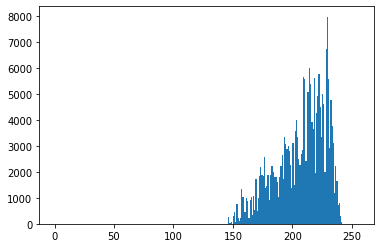

In [ ]:
plt.hist(R.ravel(),256,[0,256]); plt.show()

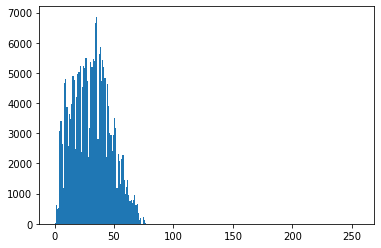

In [ ]:
plt.hist(G.ravel(),256,[0,256]); plt.show()

##Using heartpy to analyze

In [ ]:
#Installing Heartpy
!pip install heartpy

In [ ]:
#importing Libraries
import heartpy as hp
import numpy as np

In [ ]:
#Taking Red channel values for analysis 
a=[] #Contains mean of Red channel of corresponding frames

for i in range(0,900):
  image = cv2.imread('/content/kang'+str(i)+'.jpg')
  (B, G, R) = cv2.split(image)
  a.append(R.mean())


In [ ]:
#generarting time frame values for corresponding frames
def getnums(s, e,i):
   return (np.arange(s, e,i))

# Driver Code
start, end, intval = 0, 30,1/30 #we have 30 frames per sec for 30 sec 
y=getnums(start, end,intval)

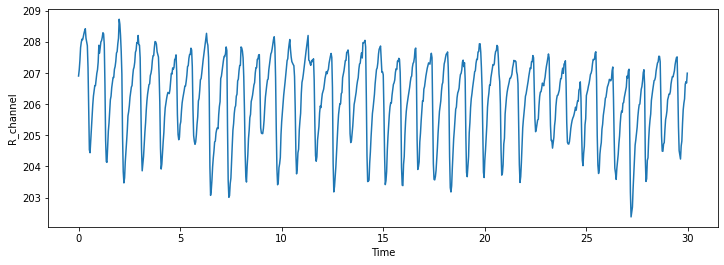

In [ ]:
#plotting the input waveform
plt.figure(figsize=(12,4))
plt.plot(y,a)
plt.xlabel('Time')
plt.ylabel('R_channel')
plt.show()

## Plotting frequncy graph

In [ ]:

def getnums(s, e,i):
   return (np.arange(s, e,i))

# Driver Code
T=.5
start, end, intval = 0, 450,1/(2*T)
xf=getnums(start, end,intval)
len(xf)

450

In [ ]:
import scipy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


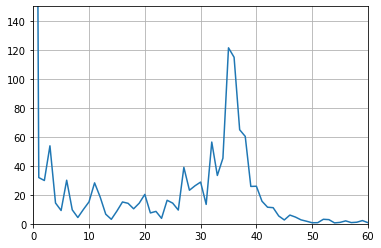

In [ ]:
from scipy.fft import fft, fftfreq
n=900
sampling_rate=30
T=1/sampling_rate
yf=scipy.fft(filtered)
#xf=np.linspace(0,1.0/(2.0*T),n/2)
fig,ax=plt.subplots()
ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
plt.xlim(0, 60)
plt.ylim(0, 150)
plt.grid()
plt.show()

In [ ]:
#checking peaks in R_channel mean values
import scipy.signal
print('Detect peaks without any filters.')
indexes = scipy.signal.find_peaks_cwt(a, np.arange(1, 4),
    max_distances=np.arange(1, 4)*2)
indexes = np.array(indexes) - 1
print('Peaks are: %s' % (indexes))

Detect peaks without any filters.
Peaks are: [  0   9  13  37  63  90 118 144 167 192 218 243 266 290 318 338 347 374
 398 423 450 474 498 521 545 570 595 622 648 671 694 719 741 764 789 812
 835 858 883 897]


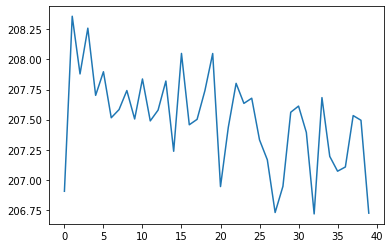

In [ ]:
#plotting peaks to observer heart rate
PPG=[]
for i in range(len(indexes)):
  PPG.append(a[indexes[i]])
plt.plot(PPG)
plt.show()

# Pre-processing
##Peak enhancement

In [ ]:
#enhancing the peaks to get rid of flattening
enhanced = hp.enhance_peaks(a, iterations=2)

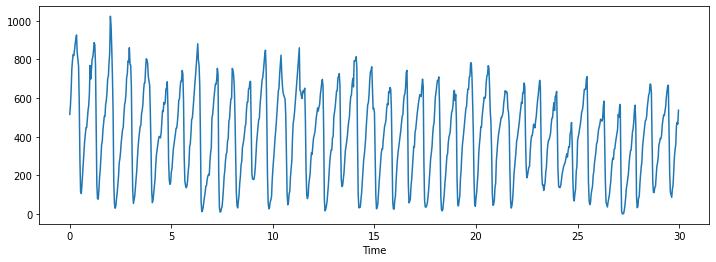

In [ ]:
#plotiing after enhancing peaks to remove flat peak
plt.figure(figsize=(12,4))
plt.plot(y,enhanced)
plt.xlabel("Time")
plt.show()

## Using a Butterworth filter

In [ ]:
#filtering the signal 

filtered = hp.filter_signal(enhanced,cutoff=5,sample_rate=100,order=3)


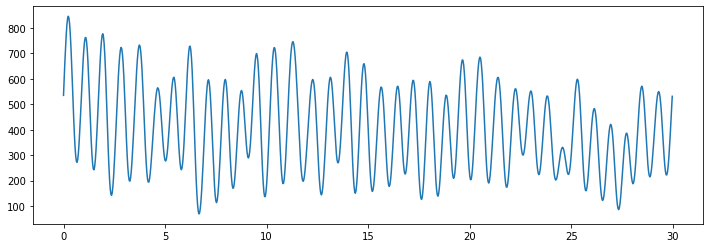

In [ ]:
#plotting the waveform
plt.figure(figsize=(12,4))
plt.plot(y,filtered)
plt.show()

In [ ]:
# creating the DataFrame
import pandas as pd
df = pd.DataFrame(a)
df = df.iloc[2:]
# displaying the DataFrame
print('DataFrame:\n', df)
   
# saving the DataFrame as a CSV file
PPM_csv_data = df.to_csv('PPM.csv', index = True)
print('\nCSV String:\n', gfg_csv_data)

DataFrame:
               0
2    207.396826
3    207.814737
4    207.978569
5    208.088037
6    208.068985
..          ...
895  206.169518
896  206.638694
897  206.722550
898  206.681392
899  206.995503

[898 rows x 1 columns]

CSV String:
 None


In [ ]:

#data = hp.get_data('GfG.csv')
fs = 30.0
working_data, measures = hp.process(filtered, fs, report_time=True)
print('breathing rate is: %s Hz' %measures['breathingrate'])


Finished in 0.018537 sec
breathing rate is: 0.21905005293709612 Hz


In [ ]:
#Getting various analysed values
for measure in measures.keys():
    print('%s: %f' %(measure, measures[measure]))

bpm: 72.262774
ibi: 830.303030
sdnn: 62.152000
sdsd: 41.450183
rmssd: 71.341473
pnn20: 0.806452
pnn50: 0.580645
hr_mad: 33.333333
sd1: 50.239339
sd2: 68.522555
s: 10815.020281
sd1/sd2: 0.733180
breathingrate: 0.219050


<Figure size 864x288 with 0 Axes>

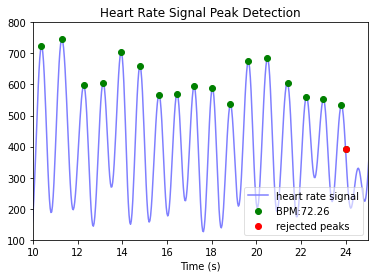

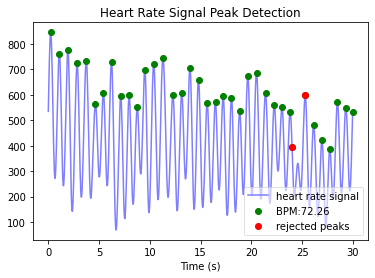

In [ ]:
#plot
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)

#let's zoom in on a bit
#plt.figure(figsize=(12,4))
plt.xlim(10, 25)
plt.ylim(100, 800)
hp.plotter(working_data, measures)

### 2nd video

In [ ]:
# Opens the Video file
cap= cv2.VideoCapture('/content/drive/MyDrive/Video from Karl 10:52')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('chang'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

In [ ]:
b=[] #getting R_mean for second video

for i in range(0,900):
  image = cv2.imread('/content/chang'+str(i)+'.jpg')
  (B, G, R) = cv2.split(image)
  b.append(R.mean())


In [ ]:
#generating time frame
import numpy as np
def getnums(s, e,i):
   return (np.arange(s, e,i))

# Driver Code
start, end, intval = 0, 30,1/30
y=getnums(start, end,intval)

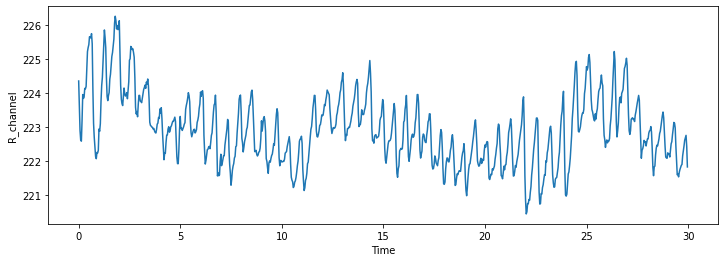

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y,b)
plt.xlabel("Time")
plt.ylabel("R_channel")
plt.show()

In [ ]:
#enhancing the peaks
enhanced1 = hp.enhance_peaks(b, iterations=2)

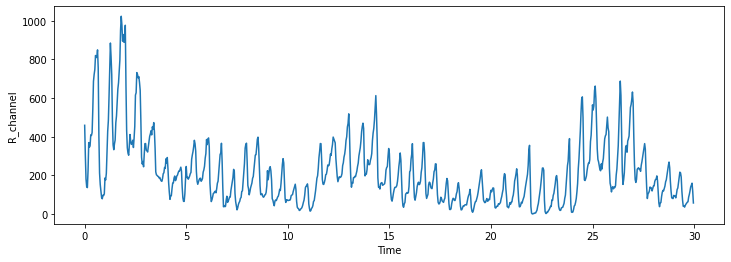

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y,enhanced1)
plt.xlabel("Time")
plt.ylabel("R_channel")
plt.show()

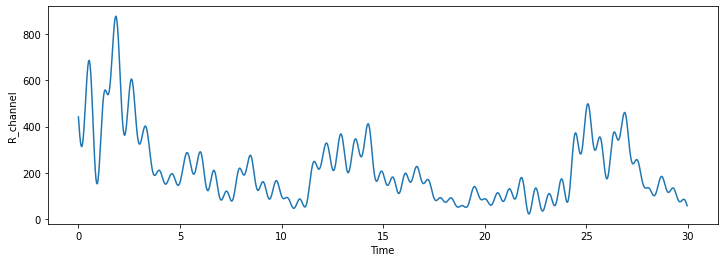

In [ ]:
#filtering the signal 

filtered1 = hp.filter_signal(enhanced1,cutoff=5,sample_rate=100,order=3)
plt.figure(figsize=(12,4))
plt.plot(y,filtered1)
plt.xlabel("Time")
plt.ylabel("R_channel")
plt.show()


In [ ]:
#analysing using heartpy

fs = 30.0
working_data, measures = hp.process(enhanced1, fs, report_time=True)
print('breathing rate is: %s Hz' %measures['breathingrate'])


Finished in 0.025273 sec
breathing rate is: 0.2223581077325032 Hz


In [ ]:
for measure in measures.keys():
    print('%s: %f' %(measure, measures[measure]))

bpm: 96.666667
ibi: 620.689655
sdnn: 56.333567
sdsd: 55.532875
rmssd: 70.147237
pnn20: 0.619048
pnn50: 0.285714
hr_mad: 33.333333
sd1: 49.283094
sd2: 67.418288
s: 10438.198642
sd1/sd2: 0.731005
breathingrate: 0.222358


<Figure size 864x288 with 0 Axes>

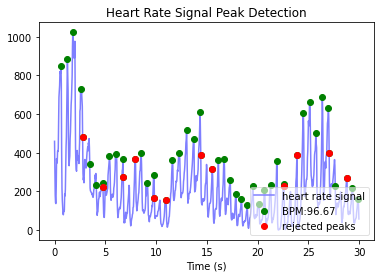

In [ ]:
#plot
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)